In [45]:
from simulations.elastic_collisions import Body, HiddenVariables, Variables, ElasticCollisionSimulation
import torch
from torch import Tensor
from torch.distributions import Distribution
from typing import Union, Callable

### The n-body collision problem

##### Visualise n body collision scenes for different bodies

#### Scenario 1 - Assumptions: 
- No force field (i.e. no air drag, attraction forces between bodies etc.)
- bodies are points of mass (a 'radius' value sets a range in which two close points are assumed to have collided)
- collisions are elastic (no loss of energy)
- the 'radius' values are the same and constant for each body
- the masses are the same and constant for each body 
- collisions with borders are also elastic
- the initial positions are fixed 

**Hidden variables:** initial velocity vectors

In [46]:

total_time = 10.0 
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius
velocity_distribution = torch.distributions.Uniform(low=-4, high=4)
position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)

num_bodies = 4
VARIABLES = Variables(
    masses = torch.full((num_bodies,), constant_mass_value),
    radii = torch.full((num_bodies,), constant_radius_value),
    starting_positions = None,
    initial_velocities= None,
    acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
    num_bodies = num_bodies,
    space_size = torch.tensor([space_size, space_size]),
)

initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
VARIABLES.starting_positions = initial_positions
print(f"initial_positions: {initial_positions}")

initial_velocities = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))
print(f"initial_velocities: {initial_velocities}")


simulation = ElasticCollisionSimulation( variables=VARIABLES, 
                                         enable_logging=False, 
                                         noise=False)

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)

result = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                             total_time=total_time, \
                             dt=dt)

position_history = simulation.get_position_history()
velocity_history = simulation.get_velocity_history()

print(f"position_history: {position_history}")

# assume that position history is of length num_bodies 
assert len(position_history) == num_bodies
assert len(velocity_history) == num_bodies

# print position histories for body 1 
print(f"position_history for body 1: {position_history[0]}")
print(f"time history for body 1: {len(position_history[0])}")

# Transform the history so that each element represents a timestep
position_history_by_timestep = list(map(list, zip(*position_history)))
velocity_history_by_timestep = list(map(list, zip(*velocity_history)))

num_timesteps = len(position_history_by_timestep)

print(f"position_history_by_timestep: {position_history_by_timestep}")

# Assume that position history is of length num_timesteps
assert len(position_history_by_timestep) == num_timesteps
assert len(velocity_history_by_timestep) == num_timesteps

# Print position histories for timestep 1
print(f"position_history for timestep 1: {position_history_by_timestep[0]}")
print(f"velocity_history for timestep 1: {velocity_history_by_timestep[0]}")

print(f"position of body 1 at timestep 1: {position_history_by_timestep[0][0]}")
print(f"velocity of body 1 at timestep 1: {velocity_history_by_timestep[0][0]}")



initial_positions: tensor([[7.9452, 6.2285],
        [1.2351, 1.0785],
        [5.4462, 8.4699],
        [6.2248, 4.8845]])
initial_velocities: tensor([[ 1.1489,  2.6297],
        [ 3.8503, -2.6282],
        [-1.4420, -3.6881],
        [ 2.6310, -1.5844]])
position_history: [[tensor([8.0601, 6.4914]), tensor([8.1750, 6.7544]), tensor([8.2899, 7.0174]), tensor([8.4048, 7.2803]), tensor([8.5197, 7.5433]), tensor([8.6346, 7.8063]), tensor([8.7495, 8.0692]), tensor([8.8643, 8.3322]), tensor([8.9792, 8.5952]), tensor([9.0941, 8.8581]), tensor([8.9792, 9.1211]), tensor([8.8643, 8.8581]), tensor([8.7495, 8.5952]), tensor([8.6346, 8.3322]), tensor([8.5197, 8.0692]), tensor([8.4048, 7.8063]), tensor([8.2899, 7.5433]), tensor([8.1750, 7.2803]), tensor([8.0601, 7.0174]), tensor([8.1311, 7.3950]), tensor([8.1991, 7.7626]), tensor([8.2672, 8.1302]), tensor([8.3352, 8.4978]), tensor([8.4033, 8.8654]), tensor([8.4713, 9.2329]), tensor([8.5394, 8.8654]), tensor([8.6074, 8.4978]), tensor([8.6755, 8.130

In [47]:
# added collision history 

collision_history_by_timestep = simulation.get_collision_history_per_timestep()

In [48]:
# loop though collision history by timestep and print out the collision history
for timestep, collisions in collision_history_by_timestep.items():
    print(f"timestep {timestep}:")
    for collision in collisions:

        # if there is key "boundary" then use that instead of body2 
        if "boundary" in collision:
            print(f"collision at time {collision['time']}: body {collision['body1']} and boundary {collision['boundary']}")
        else:
            print(f"collision at time {collision['time']}: body {collision['body1']} and body {collision['body2']}")

timestep 0:
timestep 1:
collision at time 0.1: body 1 and boundary 1
timestep 2:
timestep 3:
timestep 4:
timestep 5:
timestep 6:
timestep 7:
timestep 8:
timestep 9:
timestep 10:
collision at time 1.0: body 1 and body 2
collision at time 1.0: body 0 and boundary 0
timestep 11:
collision at time 1.1: body 0 and boundary 1
collision at time 1.1: body 3 and boundary 0
timestep 12:
timestep 13:
timestep 14:
collision at time 1.4000000000000001: body 1 and body 3
timestep 15:
timestep 16:
timestep 17:
timestep 18:
collision at time 1.8: body 3 and boundary 1
timestep 19:
collision at time 1.9000000000000001: body 0 and body 1
collision at time 1.9000000000000001: body 3 and boundary 0
timestep 20:
timestep 21:
timestep 22:
collision at time 2.2: body 2 and boundary 0
timestep 23:
collision at time 2.3000000000000003: body 1 and body 3
timestep 24:
timestep 25:
collision at time 2.5: body 0 and boundary 1
timestep 26:
collision at time 2.6: body 3 and boundary 0
timestep 27:
timestep 28:
time

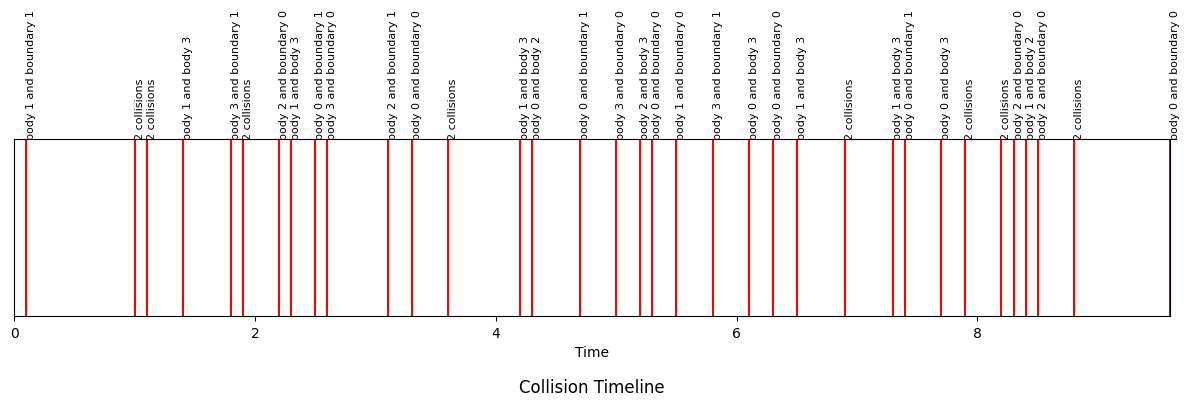

In [49]:
import matplotlib.pyplot as plt

# Get the total time span
total_time = max(collision['time'] for collisions in collision_history_by_timestep.values() for collision in collisions)

# Create a new figure
plt.figure(figsize=(12, 5))

# Loop through collision history by timestep
for timestep, collisions in collision_history_by_timestep.items():
    
    if len(collisions) == 1:
        collision = collisions[0]
        
        # Draw a vertical line at the time of the collision
        plt.vlines(collision['time'], 0, 1, colors='r')

        # Annotate the collision with smaller font size
        if "boundary" in collision:
            plt.text(collision['time'], 1, f"body {collision['body1']} and boundary {collision['boundary']}", rotation=90, verticalalignment='bottom', fontsize=8)
        else:
            plt.text(collision['time'], 1, f"body {collision['body1']} and body {collision['body2']}", rotation=90, verticalalignment='bottom', fontsize=8)
    elif len(collisions) > 1:
        collision = collisions[0]

        plt.vlines(collision['time'], 0, 1, colors='r')
        plt.text(collision['time'], 1, f"{len(collisions)} collisions", rotation=90, verticalalignment='bottom', fontsize=8)


# Set the limits and labels
plt.xlim(0, total_time)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.yticks([])
ax = plt.gca()  # get current axes
ax.text(0.5, -0.4, 'Collision Timeline', ha='center', va='center', transform=ax.transAxes, fontsize=12)


# Show the plot
plt.tight_layout()
plt.savefig('collision_timeline.png')
plt.show()

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_timestep(ax, positions, velocities, space_size, max_radius):
    # Normalize the velocity vectors
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    # Set the limits of the plot
    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Add a grid
    ax.grid(True)

    # Convert positions list to numpy array
    positions = np.array(positions)

    # Plot the positions of the bodies
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    # Add transparent circles at the location of each body
    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    # Plot the normalized velocities as vectors and display the original velocity values
    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=40)

# Number of timesteps to plot
num_timesteps = 40

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(8, 5, figsize=(80, 120))  # 5 rows, 8 columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over the timesteps
for i in range(num_timesteps):
    # Get the positions and velocities for this timestep
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]

    # Plot this timestep
    plot_timestep(axs[i], positions, velocities, space_size, max_radius)
    axs[i].set_title(f'Timestep {i}', fontsize=46)


# Adjust the space between subplots to be minimal
#plt.subplots_adjust(wspace=0.01, hspace=0.1)
# Display the plot
plt.tight_layout()
plt.show()
    #

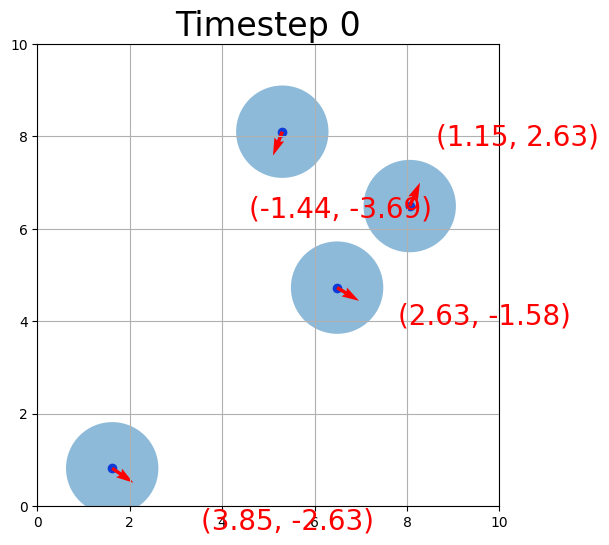

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numpy as np

def plot_timestep(i):
    ax.clear()
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])
    ax.set_aspect('equal')
    ax.grid(True)

    positions = np.array(positions)
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=20)

    ax.set_title(f'Timestep {i}', fontsize=24)

num_timesteps = 100
fig, ax = plt.subplots(figsize=(10, 6))

ani = animation.FuncAnimation(fig, plot_timestep, frames=num_timesteps, interval=200)
# Save the animation as a GIF
ani.save('animation.gif', writer=PillowWriter(fps=10))

In [52]:

position_history = simulation.get_position_history()
position_history_by_timestep_list = list(map(list, zip(*position_history)))
#position_history_by_timestep_list = list(map(list, zip(*position_history)))
print(position_history_by_timestep_list)
print(len(position_history_by_timestep_list))


[[tensor([8.0601, 6.4914]), tensor([1.6201, 0.8156]), tensor([5.3020, 8.1011]), tensor([6.4879, 4.7260])], [tensor([8.1750, 6.7544]), tensor([2.0052, 1.0785]), tensor([5.1578, 7.7323]), tensor([6.7510, 4.5676])], [tensor([8.2899, 7.0174]), tensor([2.3902, 1.3413]), tensor([5.0136, 7.3635]), tensor([7.0141, 4.4091])], [tensor([8.4048, 7.2803]), tensor([2.7752, 1.6041]), tensor([4.8694, 6.9947]), tensor([7.2772, 4.2507])], [tensor([8.5197, 7.5433]), tensor([3.1603, 1.8669]), tensor([4.7252, 6.6259]), tensor([7.5403, 4.0923])], [tensor([8.6346, 7.8063]), tensor([3.5453, 2.1297]), tensor([4.5810, 6.2571]), tensor([7.8034, 3.9338])], [tensor([8.7495, 8.0692]), tensor([3.9303, 2.3926]), tensor([4.4368, 5.8883]), tensor([8.0665, 3.7754])], [tensor([8.8643, 8.3322]), tensor([4.3153, 2.6554]), tensor([4.2926, 5.5195]), tensor([8.3296, 3.6169])], [tensor([8.9792, 8.5952]), tensor([4.7004, 2.9182]), tensor([4.1484, 5.1507]), tensor([8.5927, 3.4585])], [tensor([9.0941, 8.8581]), tensor([5.0854, 3.

In [53]:

t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
result = torch.stack(t_tensor_list, dim=0)
print(result.shape)
print(result)

torch.Size([100, 8])
tensor([[8.0601, 6.4914, 1.6201, 0.8156, 5.3020, 8.1011, 6.4879, 4.7260],
        [8.1750, 6.7544, 2.0052, 1.0785, 5.1578, 7.7323, 6.7510, 4.5676],
        [8.2899, 7.0174, 2.3902, 1.3413, 5.0136, 7.3635, 7.0141, 4.4091],
        [8.4048, 7.2803, 2.7752, 1.6041, 4.8694, 6.9947, 7.2772, 4.2507],
        [8.5197, 7.5433, 3.1603, 1.8669, 4.7252, 6.6259, 7.5403, 4.0923],
        [8.6346, 7.8063, 3.5453, 2.1297, 4.5810, 6.2571, 7.8034, 3.9338],
        [8.7495, 8.0692, 3.9303, 2.3926, 4.4368, 5.8883, 8.0665, 3.7754],
        [8.8643, 8.3322, 4.3153, 2.6554, 4.2926, 5.5195, 8.3296, 3.6169],
        [8.9792, 8.5952, 4.7004, 2.9182, 4.1484, 5.1507, 8.5927, 3.4585],
        [9.0941, 8.8581, 5.0854, 3.1810, 4.0042, 4.7818, 8.8558, 3.3000],
        [8.9792, 9.1211, 5.5995, 3.2527, 3.7309, 4.6042, 9.1189, 3.1416],
        [8.8643, 8.8581, 6.1117, 3.3272, 3.4596, 4.4236, 8.8558, 2.9831],
        [8.7495, 8.5952, 6.6239, 3.4018, 3.1882, 4.2431, 8.5927, 2.8247],
        [8.6346, 

In [54]:
import torch
import torch

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)


labels = ["num_bodies", "masses", "radii", "acceleration_coefficients", "initial_v"]

def prior_fn_basic(n_samples: int = 1) -> torch.Tensor:
    constant_mass_value = 1.0
    constant_radius_value = max_radius
    acceleration_coefficient_value = 0.0
    velocity_distribution = torch.distributions.Uniform(low=-4, high=4)

    num_bodies = torch.tensor(2)
    masses = torch.full((num_bodies,), constant_mass_value)
    radii = torch.full((num_bodies,), constant_radius_value)
    a_coeffs = torch.full((num_bodies,), acceleration_coefficient_value)
    initial_v = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))


    flattened_tensors = torch.cat([torch.flatten(num_bodies),
                                   torch.flatten(masses),
                                   torch.flatten(radii),
                                   torch.flatten(a_coeffs),
                                   torch.flatten(initial_v)], dim=0)
    
    # concatenate flattened tensors n_samples times
    return torch.stack([flattened_tensors for _ in range(n_samples)], dim=0)


In [55]:

# prior and simulation interfaces
class Prior:
    def __init__(self, prior_fn, labels):
        self.prior_fn = prior_fn
        self.labels = labels
        self.mean = None
        self.std = None
        
    def sample(self, num_samples: int = 1) -> torch.Tensor:
        samples = self.prior_fn(num_samples)
        self.mean = torch.mean(samples)
        self.std = torch.std(samples)
        return samples
        
    def get_stats(self):
        if self.mean is None and self.std is None:
            raise ValueError("Sample first before getting stats")
        else:
            return self.mean, self.std
    
    def get_labels(self):
        return self.labels

In [56]:
basic_prior = Prior(prior_fn_basic, labels)
some_X = basic_prior.sample(1)
print(f"some_X: {some_X}")

some_X: tensor([[ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000,  3.6611,
         -1.5227, -2.7118, -0.4031]])


In [57]:
import torch
import torch
# data set creation 
# X - input data - position histories by timestep 
# Y - ouput data - hidden varriables 

total_time = 10.0 
num_bodies = 2
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius


VARIABLES = Variables(
        masses = torch.full((num_bodies,), constant_mass_value),
        radii = torch.full((num_bodies,), constant_radius_value),
        starting_positions = None,
        initial_velocities= None,
        acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
        num_bodies = num_bodies,
        space_size = torch.tensor([space_size, space_size]),
    )

def simulate_collisions_simple(Y_i, VARIABLES, total_time, dt):

    position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)
    HIDDENVARIABLES = HiddenVariables.from_tensor(Y_i)

    initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
    VARIABLES.starting_positions = initial_positions
    print(f"initial_positions: {initial_positions}")

    simulation = ElasticCollisionSimulation(variables=VARIABLES, 
                                            enable_logging=False, 
                                            noise=False)

    _ = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                            total_time=total_time, \
                            dt=dt)
    
    position_history_by_timestep_list = list(map(list, zip(*position_history)))
    t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
    return torch.stack(t_tensor_list, dim=0)

# Generate a simulated training dataset using the SIR model and prior distribution

    #position_history_by_timestep = list(map(list, zip(*position_history)))
    #position_history_tensor = torch.tensor(position_history)
    


# Generate a simulated training dataset using the SIR model and prior distribution
def generate_training_data(num_samples, VARIABLES, total_time,dt, prior):

    Y = prior.sample(num_samples)

    X = []
    for i in range(num_samples):
        # access entries in Y torch tensor along the -1th dimension
        Y_i = Y[i]

        # -------- create X values using the simulation function 
        X_i = simulate_collisions_simple(Y_i, VARIABLES, total_time, dt)
        X.append(X_i)

    # X is a list of tensors, convert to a single tensor
    X = torch.stack(X, dim=0)
    return X, Y



In [58]:
X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)
print(f"X_train shape: {X_train.shape}")
print(f"X_train: {X_train}")

RuntimeError: shape '[2, 2]' is invalid for input of size 0

In [ ]:
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_train: {Y_train}")

Y_train shape: torch.Size([11, 5])
Y_train: tensor([[ 2.0000,  2.0000,  2.0000,  2.0000,  2.0000],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-2.2620, -0.6098,  1.3135, -1.7247, -0.4140],
        [ 1.0095, -2.8056, -1.1229,  1.3567,  0.9867],
        [ 1.1248, -1.2853,  1.9890,  1.0492, -1.0895],
        [-1.9653,  1.1696, -2.0787, -2.3125, -2.9885]])


#### Training simple feed-forward predictor model

In [ ]:
from torch import nn

# Define the neural network architecture
class ParameterPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ParameterPredictor, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, 3)  # Output layer with 3 neurons for λ, μ, and I0

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Define the number of training and test samples
num_train_samples = 80  # Adjust as needed
num_test_samples = 20   # Adjust as needed
T = 10
# Generate training data
X_train, Y_train = generate_training_data(num_train_samples, T, prior_distribution)
print("X_train shape:", X_train.shape)
# Generate test data
X_test, Y_test = generate_training_data(num_test_samples, T, prior_distribution)

#print(X_train.shape)
# Create instances of the feature extractor and Conditional RealNVP
blocks = 10
num_epochs = 30
hidden_size = 64
condition_size = hidden_size
f_input_size = 200
# Define the batch size
batch_size = 10

In [ ]:

# Create the neural network
T = 100
input_size = T * 2  # Input shape is (T, 2) for X
hidden_size = 64
model = ParameterPredictor(input_size, hidden_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Generate training data
num_samples = 1000  # Adjust as needed
T = 100
prior_distribution = SimplePriorDistribution(lam_range=(0.1, 0.5), mu_range=(0.05, 0.5), I0_range=(0.05, 0.2))
X_train, Y_train = generate_training_data(num_samples, T, prior_distribution)

In [ ]:
# Training loop
num_epochs = 50
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, num_samples, batch_size):
        inputs = X_train[i:i+batch_size]
        labels = Y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Evaluate the model on a simulated test set (similar to training data generation)
X_test, Y_test = generate_training_data(num_samples, T, prior_distribution)
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)

print(f"Test loss: {test_loss.item()}")

In [ ]:
# Lists to store results
hidden_sizes = [32, 64,128]  # Vary hidden layer size
train_set_sizes = [500, 1000, 2000]  # Vary training set size
accuracies = []

# Training loop
for hidden_size in hidden_sizes:
    for train_set_size in train_set_sizes:
        model = ParameterPredictor(input_size, hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)

        num_epochs = 50
        batch_size = 32
        losses = []

        for epoch in range(num_epochs):
            for i in range(0, train_set_size, batch_size):
                inputs = X_train[i:i+batch_size]
                labels = Y_train[i:i+batch_size]

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            losses.append(loss.item())

        # Evaluate the model on a simulated test set (similar to training data generation)
        X_test, Y_test = generate_training_data(num_samples, T, prior_distribution)
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, Y_test)

        
        accuracies.append(test_loss.item())

# Create a heatmap of accuracies
accuracies = np.array(accuracies).reshape(len(hidden_sizes), len(train_set_sizes))
plt.figure(figsize=(10, 6))
plt.imshow(accuracies, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Test Loss')
plt.xticks(np.arange(len(train_set_sizes)), train_set_sizes)
plt.yticks(np.arange(len(hidden_sizes)), hidden_sizes)
plt.xlabel('Training Set Size')
plt.ylabel('Hidden Layer Size')
plt.title('Accuracy Heatmap')
plt.show()